In [1]:
%matplotlib inline


PyTorch是什么?
================

基于Python的科学计算包，服务于以下两种场景:

-  作为NumPy的替代品，可以使用GPU的强大计算能力
-  提供最大的灵活性和高速的深度学习研究平台
    

开始
---------------

Tensors（张量）

Tensors与Numpy中的 ndarrays类似，但是在PyTorch中
Tensors 可以使用GPU进行计算.



In [2]:
from __future__ import print_function
import torch

创建一个随机初始化的 5x3 矩阵,从区间[0, 1)的均匀分布中抽取的一组随机数。



In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.1229, 0.9889, 0.1355],
        [0.4390, 0.3074, 0.4021],
        [0.9775, 0.8849, 0.8737],
        [0.7576, 0.7605, 0.4389],
        [0.1719, 0.3396, 0.5970]])


创建一个0填充的矩阵，数据类型为long:



In [4]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


创建tensor并使用现有张量初始化,这些方法将重用输入张量的属性，例如， dtype，除非设置新的值进行覆盖



In [5]:
x = torch.tensor([5.5, 3])
print(x)
x = x.new_ones(5, 3, dtype=torch.double)      # new_* 方法来创建对象
print(x)

tensor([5.5000, 3.0000])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


使用size方法与Numpy的shape属性返回的相同


In [6]:
print(x.size())

torch.Size([5, 3])


<div class="alert alert-info"><h4>Note</h4><p>``torch.Size`` 返回值是元组类型, 所以它支持元组类型的所有操作.</p></div>

操作

操作有多种语法。 

我们将看一下加法运算。

In [7]:
y = torch.rand(5, 3,dtype=torch.double)
print(x + y)  #torch.rand(5,3)   print(x+y)

tensor([[1.6285, 1.5499, 1.5406],
        [1.1913, 1.2007, 1.0951],
        [1.7095, 1.9433, 1.2320],
        [1.4224, 1.8652, 1.1397],
        [1.4963, 1.5091, 1.4930]], dtype=torch.float64)


提供输出tensor作为参数



In [8]:
result = torch.empty(5, 3,dtype=torch.double)
torch.add(x, y, out=result)
print(result)

tensor([[1.6285, 1.5499, 1.5406],
        [1.1913, 1.2007, 1.0951],
        [1.7095, 1.9433, 1.2320],
        [1.4224, 1.8652, 1.1397],
        [1.4963, 1.5091, 1.4930]], dtype=torch.float64)


``torch.view``: 可以改变张量的维度和大小

torch.view 与Numpy的reshape类似



In [9]:
x = torch.randn(4, 4)
print(x)
y = x.view(16)
print(y)
z = x.view(-1, 8)  #  size -1 从其他维度推断
print(z)
print(x.size(), y.size(), z.size())

tensor([[ 1.2692,  0.3556,  0.5456, -0.0811],
        [ 0.2682,  1.0329,  0.6549, -0.2632],
        [-1.2317, -1.2585,  0.8812, -1.0837],
        [-1.5666, -0.9499, -0.7263, -1.1510]])
tensor([ 1.2692,  0.3556,  0.5456, -0.0811,  0.2682,  1.0329,  0.6549, -0.2632,
        -1.2317, -1.2585,  0.8812, -1.0837, -1.5666, -0.9499, -0.7263, -1.1510])
tensor([[ 1.2692,  0.3556,  0.5456, -0.0811,  0.2682,  1.0329,  0.6549, -0.2632],
        [-1.2317, -1.2585,  0.8812, -1.0837, -1.5666, -0.9499, -0.7263, -1.1510]])
torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


如果你有只有一个元素的张量，使用``.item()``来得到Python数据类型的数值


In [10]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.4100])
0.41002100706100464



NumPy 转换
------------

将一个Torch Tensor转换为NumPy数组是一件轻松的事，反之亦然。

Torch Tensor与NumPy数组共享底层内存地址，修改一个会导致另一个的变化。

将一个Torch Tensor转换为NumPy数组



In [11]:
a = torch.ones(2,5)
print(a)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [12]:
b = a.numpy()
print(b)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


 NumPy Array 转化成 Torch Tensor

使用from_numpy自动转化



In [13]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)



所有的 Tensor 类型默认都是基于CPU， CharTensor 类型不支持到
NumPy 的转换.
CUDA 张量
------------

使用``.to`` 方法 可以将Tensor移动到任何设备中



In [14]:
# is_available 函数判断是否有cuda可以使用
# ``torch.device``将张量移动到指定的设备中
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA 设备对象
    y = torch.ones_like(x, device=device)  # 直接从GPU创建张量
    x = x.to(device)                       # 或者直接使用``.to("cuda")``将张量移动到cuda中
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` 也会对变量的类型做更改

In [15]:
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
import cv2

In [16]:
img=Image.open('py.jpeg')
import torchvision.transforms as transforms
transform1=transforms.Compose([transforms.ToTensor()])
tensor1=transform1(img)
print(tensor1.size())

torch.Size([3, 606, 1080])


In [17]:
array1 = tensor1.numpy()
print(array1.shape)
print(array1)
tensor2 = torch.Tensor(array1)
print(tensor2.size())

(3, 606, 1080)
[[[0.81960785 0.81960785 0.81960785 ... 0.5882353  0.5882353  0.5882353 ]
  [0.81960785 0.81960785 0.81960785 ... 0.5882353  0.5882353  0.5882353 ]
  [0.81960785 0.81960785 0.81960785 ... 0.5882353  0.5882353  0.5882353 ]
  ...
  [0.87058824 0.87058824 0.87058824 ... 0.6509804  0.6509804  0.6509804 ]
  [0.87058824 0.87058824 0.87058824 ... 0.6509804  0.6509804  0.6509804 ]
  [0.87058824 0.87058824 0.87058824 ... 0.6509804  0.6509804  0.6509804 ]]

 [[0.20784314 0.20784314 0.20784314 ... 0.11764706 0.11764706 0.11764706]
  [0.20784314 0.20784314 0.20784314 ... 0.11764706 0.11764706 0.11764706]
  [0.20784314 0.20784314 0.20784314 ... 0.11764706 0.11764706 0.11764706]
  ...
  [0.23137255 0.23137255 0.23137255 ... 0.14117648 0.14117648 0.14117648]
  [0.23137255 0.23137255 0.23137255 ... 0.14117648 0.14117648 0.14117648]
  [0.23137255 0.23137255 0.23137255 ... 0.14117648 0.14117648 0.14117648]]

 [[0.21960784 0.21960784 0.21960784 ... 0.45882353 0.45882353 0.45882353]
  [0.21

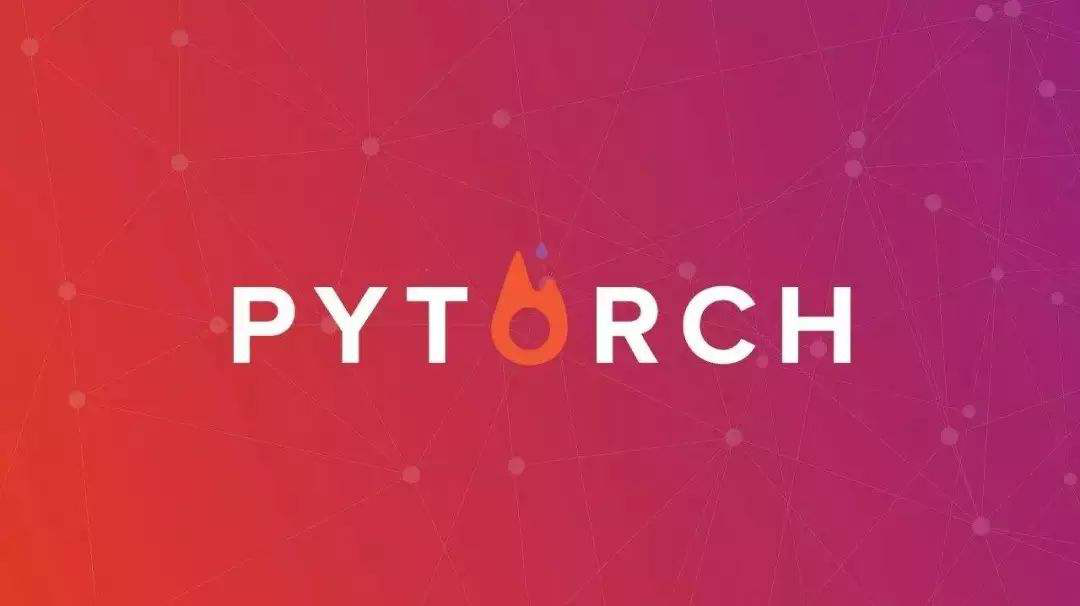

In [18]:
maxi=array1.max()
a=array1/maxi*255
a=a.transpose(1,2,0).astype(np.uint8)
b=Image.fromarray(a)
b